In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [156]:
df = pd.read_csv("D:\Assignment\delivery_time.csv")

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [158]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [159]:
df.rename({'Delivery Time': 'D_time', 'Sorting Time':'S_time'}, axis = 1)

,D_time,S_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:xlabel='S_time', ylabel='Density'>

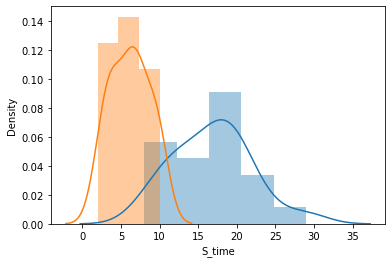

In [160]:
sns.distplot(a = df_re['D_time'])
sns.distplot(a = df_re['S_time'])

<AxesSubplot:xlabel='S_time', ylabel='D_time'>

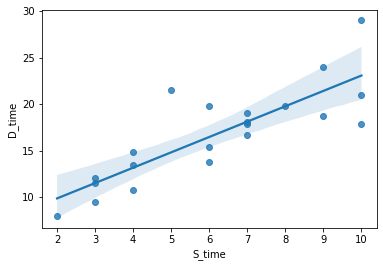

In [161]:
sns.regplot (y = df_re['D_time'], x = df_re ['S_time'])

<AxesSubplot:xlabel='S_time', ylabel='D_time'>

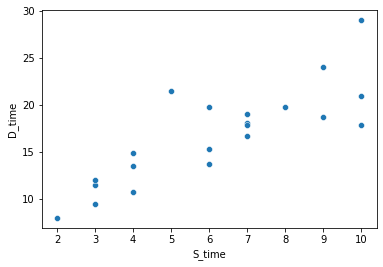

In [162]:
sns.scatterplot(y = df_re['D_time'], x = df_re ['S_time'])

In [163]:
df_re.corr()

,D_time,S_time
D_time,1.000000,0.825997
S_time,0.825997,1.000000


In [164]:
model_1 = smf.ols('D_time~S_time', data= df_re).fit()

In [165]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 D_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        00:17:58   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
S_time         1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
model_2 = smf.ols('np.sqrt(D_time)~ np.sqrt(S_time)', data= df_re). fit()

In [168]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(D_time)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           8.48e-07
Time:                        00:17:59   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(S_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
model_3 = smf.ols('np.log(D_time)~np.log(S_time)', data= df_re). fit()

In [171]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(D_time)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.60e-07
Time:                        00:18:01   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.7420      0.133     13.086      0.000       1.463       2.021
np.log(S_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
model_4 = smf.ols('np.cbrt(D_time)~np.cbrt(S_time)', data= df_re).fit()

In [174]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(D_time)   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     55.25
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           4.90e-07
Time:                        00:18:03   Log-Likelihood:                 13.035
No. Observations:                  21   AIC:                            -22.07
Df Residuals:                      19   BIC:                            -19.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(S_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

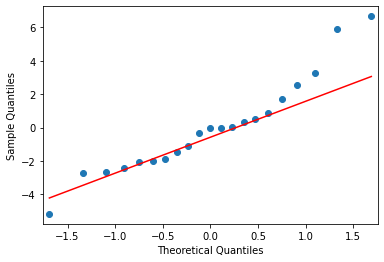

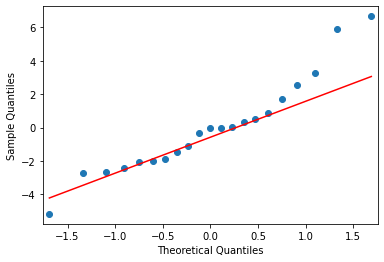

In [178]:
sm.qqplot(model_1.resid, line = 'q')

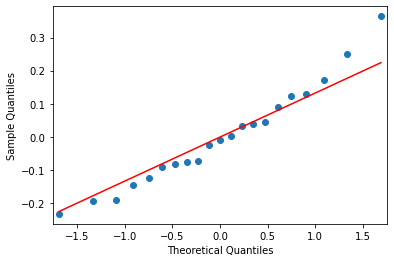

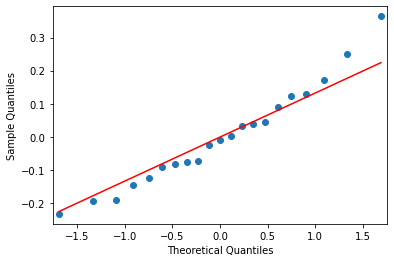

In [179]:
sm.qqplot(model_3.resid, line = 'q')

In [198]:
predicted = pd.DataFrame()
predicted['S_time'] = df_re.S_time
predicted['D_time'] = df_re.D_time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(model_1.predict(predicted.S_time))
predicted

,S_time,D_time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


In [196]:
predict = pd.DataFrame()
predict['S_time'] = df_re.S_time
predict['D_time'] = df_re.D_time
predict['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model_3.predict(predict.S_time)))
predict

,S_time,D_time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593
